# Intraday Volatility Analysis
An analysis of intraday volatility in selected stable coins.  Intraday dataset of high resolution were challenging to find.  Although we were unable to identify datasets for all of the stablecoins we were interested in analyzing, we believe the selected set is representative of most stablecoins in the market.

## Selected stablecoins
* DAI
* PAX
* UST


In [1]:
import pandas as pd
from utils.utils import epoch_to_datetime
from pathlib import Path
%matplotlib inline

## Data Preparation

Data for these datasets was obtained from Kaggle.
Inspection of these data sets revealed the following:

* the 3 stable coin files have the same format
* time is represented using Unix Epochtime in milliseconds

### File Format
The data is CSV and the schema is:
```
    time, open, close, high, low, volume
    where:
       * time is Unix epoch time in milliseconds
       * open is float
       * close is float
       * high is float
       * low is float
```

to facilitate understanding and analysis, a human readable time will be added to the dataframe

In [2]:
def prep_kaggle_coin_dataframe(coin_df):
    """Performs the repeatable prep and normalization activities on the coin data frame provided as input
    The format is expected to be:
    time, open, close, high, low, volume
    where:
       * time is Unix epoch time in milliseconds
       * open is float
       * close is float
       * high is float
       * low is float
    
    Parameters:
        coin_df (DataFrame): the coin dataframe to prepare and normalize
       
    Returns:
        DataFrame: the cleaned and normalized dataframe
    """
    # To be consistent with Pandas behavior, clone the dataframe and leave the original unaltered
    result_df = coin_df.copy()
    
    # scale Unix epoc time milli to normal Unix epoch time, which is in seconds
    result_df['time'] = result_df['time']/1000
    
    # add a human readable time column
    result_df['timestamp'] =  result_df['time'].apply(epoch_to_datetime)
    
    # set the unix epoch time column as the index
    result_df.set_index('timestamp',inplace=True)
    
    # sort data frame
    result_df.sort_index(inplace=True)
    
    
    #return the prepped and normalized dataframe
    return result_df

In [3]:
def describe_with_iqr(data_df):
    """Creates a descriptive statistics of the dataframe that includes interquartile range.
    The standard Pandas DataFrame.describe() does not include the interquartile eage,
    This method adds the interquatile range to the DataFrame.describe() descriptive statistics.
    
    The interquartile range represents the range of the central 50% of the dataset and is defined 
    as the range between 75% percentile to the 25% percentile.
    
    Parameters:
        data_df (DataFrame): the dataframe to generate descriptive statistics for

    Returns:
        DataFrame: a dataframe that represents the descriptive statistics for the input data, which includes the interquartile range
    """
    # get the standard descriptive statistics for the FataFrame
    describe_df = data_df.describe() 
    describe_df.loc['IQR',:] = describe_df.loc['75%',:]-describe_df.loc['25%',:]
    return describe_df

In [4]:
# read DAI csv file into a dataframe
dai_minute_df = pd.read_csv(
    Path('Resources/daiusd.csv')
)

# prep dataframe
dai_minute_df = prep_kaggle_coin_dataframe(dai_minute_df)

# inspect dataframe
print("DAI")
print("------------------------")
display(dai_minute_df.head())
display(dai_minute_df.tail())
display(dai_minute_df.info())
display(describe_with_iqr(dai_minute_df))
print("------------------------")


DAI
------------------------


,time,open,close,high,low,volume
timestamp,,,,,,
2018-04-18 12:19:00-04:00,1.524068e+09,0.99989,0.99989,0.99989,0.99989,1023.773958
2018-04-18 12:23:00-04:00,1.524069e+09,0.99910,0.99910,0.99910,0.99910,50.000000
2018-04-18 12:43:00-04:00,1.524070e+09,0.99989,0.99989,0.99989,0.99989,625.572847
2018-04-18 12:52:00-04:00,1.524070e+09,0.99900,0.99900,0.99900,0.99900,242.865296
2018-04-18 12:58:00-04:00,1.524071e+09,0.99900,0.99900,0.99900,0.99900,36.699715


,time,open,close,high,low,volume
timestamp,,,,,,
2022-05-07 05:54:00-04:00,1.651917e+09,1.0006,1.0006,1.0006,1.0006,2.488245
2022-05-07 05:57:00-04:00,1.651917e+09,1.0009,1.0009,1.0009,1.0009,3.691632
2022-05-07 05:58:00-04:00,1.651917e+09,1.0006,1.0005,1.0006,1.0005,14.000000
2022-05-07 06:01:00-04:00,1.651918e+09,1.0009,1.0009,1.0009,1.0009,2.690779
2022-05-07 06:02:00-04:00,1.651918e+09,1.0006,1.0006,1.0006,1.0006,3.901711


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 256066 entries, 2018-04-18 12:19:00-04:00 to 2022-05-07 06:02:00-04:00
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    256066 non-null  float64
 1   open    256066 non-null  float64
 2   close   256066 non-null  float64
 3   high    256066 non-null  float64
 4   low     256066 non-null  float64
 5   volume  256066 non-null  float64
dtypes: float64(6)
memory usage: 13.7 MB


None

,time,open,close,high,low,volume
count,2.560660e+05,256066.000000,256066.000000,256066.000000,256066.000000,2.560660e+05
mean,1.614671e+09,1.003101,1.003124,1.003244,1.002985,7.632220e+02
std,3.043071e+07,0.008831,0.012738,0.012870,0.008747,5.136749e+03
min,1.524068e+09,0.944230,0.944230,0.945000,0.931450,1.000000e-08
25%,1.596303e+09,1.000100,1.000000,1.000100,1.000000,4.727313e+00
50%,1.621527e+09,1.000600,1.000600,1.000700,1.000600,2.000000e+01
75%,1.638117e+09,1.003200,1.003200,1.003300,1.003000,1.650157e+02
max,1.651918e+09,1.249900,3.678000,3.678000,1.249900,5.204178e+05
IQR,4.181406e+07,0.003100,0.003200,0.003200,0.003000,1.602884e+02


------------------------


In [5]:
# read PAX csv file into a dataframe
pax_minute_df = pd.read_csv(
    Path('Resources/paxusd.csv')
)

# prep dataframe
pax_minute_df = prep_kaggle_coin_dataframe(pax_minute_df)


# inspect dataframe
print("PAX")
print("------------------------")
display(pax_minute_df.head())
display(pax_minute_df.tail())
display(pax_minute_df.info())
display(describe_with_iqr(pax_minute_df))
print("------------------------")


PAX
------------------------


,time,open,close,high,low,volume
timestamp,,,,,,
2018-12-19 15:25:00-05:00,1.545251e+09,1.0343,1.0343,1.0343,1.0343,95.226894
2018-12-19 15:46:00-05:00,1.545252e+09,1.0343,1.0343,1.0343,1.0343,684.815500
2018-12-19 17:02:00-05:00,1.545257e+09,1.0343,1.0348,1.0348,1.0343,502.601606
2018-12-19 17:04:00-05:00,1.545257e+09,1.0348,1.0350,1.0350,1.0348,10555.053276
2018-12-19 17:06:00-05:00,1.545257e+09,1.0350,1.0350,1.0350,1.0350,394.379800


,time,open,close,high,low,volume
timestamp,,,,,,
2022-05-06 08:34:00-04:00,1.651840e+09,1.0008,1.0008,1.0008,1.0008,77.841399
2022-05-06 19:31:00-04:00,1.651880e+09,1.0009,1.0009,1.0009,1.0009,77.685716
2022-05-07 01:58:00-04:00,1.651903e+09,1.0010,1.0010,1.0010,1.0010,77.522600
2022-05-07 05:05:00-04:00,1.651914e+09,1.0009,1.0009,1.0009,1.0009,77.367554
2022-05-07 05:50:00-04:00,1.651917e+09,1.0010,1.0010,1.0010,1.0010,77.205106


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 143564 entries, 2018-12-19 15:25:00-05:00 to 2022-05-07 05:50:00-04:00
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   time    143564 non-null  float64
 1   open    143564 non-null  float64
 2   close   143564 non-null  float64
 3   high    143564 non-null  float64
 4   low     143564 non-null  float64
 5   volume  143564 non-null  float64
dtypes: float64(6)
memory usage: 7.7 MB


None

,time,open,close,high,low,volume
count,1.435640e+05,143564.000000,143564.000000,143564.000000,143564.000000,143564.000000
mean,1.562415e+09,1.018773,1.018787,1.018956,1.018605,868.479074
std,2.451960e+07,0.018820,0.018704,0.019020,0.018498,8499.048486
min,1.545251e+09,0.900070,0.803330,0.900160,0.803310,0.000066
25%,1.550578e+09,1.005900,1.005900,1.006000,1.005700,24.740000
50%,1.553214e+09,1.019600,1.019600,1.019800,1.019400,35.720000
75%,1.556094e+09,1.025700,1.025700,1.025900,1.025500,46.580000
max,1.651917e+09,5.490200,5.297900,5.490200,5.297900,974550.080742
IQR,5.516325e+06,0.019800,0.019800,0.019900,0.019800,21.840000


------------------------


In [6]:
# read UST csv file into a dataframe
ust_minute_df = pd.read_csv(
    Path('Resources/ustusd.csv')
)

# prep dataframe
ust_minute_df = prep_kaggle_coin_dataframe(ust_minute_df)


# inspect dataframe
print("UST")
print("------------------------")
display(ust_minute_df.head())
display(ust_minute_df.tail())
display(ust_minute_df.info())
display(describe_with_iqr(ust_minute_df))
print("------------------------")


UST
------------------------


,time,open,close,high,low,volume
timestamp,,,,,,
2018-12-16 04:02:00-05:00,1.544951e+09,1.0249,1.0250,1.0250,1.0249,2194.161027
2018-12-16 04:07:00-05:00,1.544951e+09,1.0250,1.0250,1.0250,1.0250,39.853420
2018-12-16 04:08:00-05:00,1.544951e+09,1.0250,1.0250,1.0250,1.0250,113.510104
2018-12-16 04:09:00-05:00,1.544951e+09,1.0250,1.0250,1.0250,1.0250,11846.709951
2018-12-16 04:16:00-05:00,1.544952e+09,1.0245,1.0245,1.0245,1.0245,113.903120


,time,open,close,high,low,volume
timestamp,,,,,,
2022-05-07 06:22:00-04:00,1.651919e+09,1.0004,1.0004,1.0004,1.0004,23909.828140
2022-05-07 06:23:00-04:00,1.651919e+09,1.0004,1.0003,1.0004,1.0003,613.792263
2022-05-07 06:24:00-04:00,1.651919e+09,1.0004,1.0003,1.0004,1.0003,10955.342234
2022-05-07 06:25:00-04:00,1.651919e+09,1.0004,1.0004,1.0004,1.0004,10.685386
2022-05-07 06:26:00-04:00,1.651919e+09,1.0004,1.0004,1.0004,1.0004,1469.063846


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1230255 entries, 2018-12-16 04:02:00-05:00 to 2022-05-07 06:26:00-04:00
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   time    1230255 non-null  float64
 1   open    1230255 non-null  float64
 2   close   1230255 non-null  float64
 3   high    1230255 non-null  float64
 4   low     1230255 non-null  float64
 5   volume  1230255 non-null  float64
dtypes: float64(6)
memory usage: 65.7 MB


None

,time,open,close,high,low,volume
count,1.230255e+06,1.230255e+06,1.230255e+06,1.230255e+06,1.230255e+06,1.230255e+06
mean,1.607403e+09,1.002545e+00,1.002546e+00,1.002586e+00,1.002502e+00,4.232315e+04
std,2.905142e+07,7.043352e-03,7.044918e-03,7.055586e-03,7.030506e-03,2.191430e+05
min,1.544951e+09,9.801200e-01,9.806400e-01,9.810000e-01,9.796200e-01,1.000000e-08
25%,1.586167e+09,1.000200e+00,1.000200e+00,1.000200e+00,1.000100e+00,9.273509e+02
50%,1.611341e+09,1.000600e+00,1.000600e+00,1.000700e+00,1.000600e+00,5.735587e+03
75%,1.631288e+09,1.001700e+00,1.001700e+00,1.001800e+00,1.001700e+00,2.613967e+04
max,1.651919e+09,1.060000e+00,1.060000e+00,1.060000e+00,1.056500e+00,4.800747e+07
IQR,4.512111e+07,1.500000e-03,1.500000e-03,1.600000e-03,1.600000e-03,2.521232e+04


------------------------


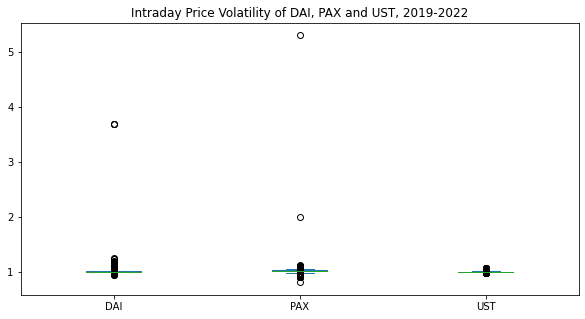

In [7]:
# create a comparative box plot of the overall volatility of the selected stablecoins
coins_df = pd.concat(
    [dai_minute_df['close'],pax_minute_df['close'],ust_minute_df['close']],
    axis=1
)
coins_df.columns=['DAI','PAX','UST']
coins_minute_box_plot = coins_df.plot(
    kind='box',
    title='Intraday Price Volatility of DAI, PAX and UST, 2019-2022',
    figsize=(10,5)
)

#### Box plot findings
The above box plot reveals how rare extreme outliers are.  The extreme outliers distort the range fo the graph that it makes comparative analysis of the box plot difficult.  
Removing extreme outliers will enable a more meaningful boxplot comparison.  Anything above 1.8 will be considered an extreme outlier and will be removed from the series.

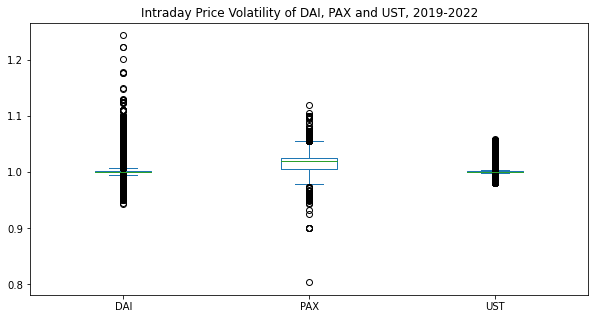

In [8]:
# remove extreme outliers
dai_close_prices = dai_minute_df['close'][dai_minute_df['close']<1.8]
pax_close_prices = pax_minute_df['close'][pax_minute_df['close']<1.8]
ust_close_prices = ust_minute_df['close'][ust_minute_df['close']<1.8]
coins_df = pd.concat(
    [dai_close_prices,pax_close_prices,ust_close_prices],
    axis=1
)
coins_df.columns=['DAI','PAX','UST']
coins_minute_box_plot = coins_df.plot(
    kind='box',
    title='Intraday Price Volatility of DAI, PAX and UST, 2019-2022',
    figsize=(10,5)
)
# TODO see about adding a jitter to these to better should the outlier density

### Dataset Review

The intraday data was available for DAI, PAX and UST is summarized in the following table:


| Currency | Record Count | Start Date | End Date | Mean | Standard Deviation | Min | Max |
|----------|--------------|------------|----------|------|--------------------|-----|-----|
| DAI | 256066 | 2018-04-18 | 2022-05-07 | 1.0031 | 0.013 | 0.944 | 3.678 |
| PAX | 143564 | 2018-12-19 | 2022-05-07 | 1.0188 | 0.019 | 0.803 | 5.490 |
| UST | 1230255 | 2018-12-16 | 2022-05-07 | 1.0025 | 0.007 | 0.980 | 1.060 |

From the above summary and the comparative box plot of intraday price volatility, it can be observed that there is volatility in stablecoin pricing and that the volatility differs between stablecoins.  This could indicate that some stablecoins might provide better arbitrage opportunities than other stable coins.

Of that of the 3 selected digital currencies, UST was the lease volatile.  UST has the smaller interquartile range (the shortest whiskers).  It also has the smallest standard deviation. UST was the truest of the stable coins and was more consistently close to its stable value of \\$1.00.  Which such a small variance in price, the **UST** stablecoin is most likely **not a good candidate** for arbitrage based on price volatility.

Over the timeframe of the dataset, although DAI had more extreme outliers than PAX, PAX was more volatire than DAI.  PAX had the largest interquartile range (the longest whiskers), as well as the largest standard deviation of the three.  It was also the only digital currency in this sampling whose mean was not \\$1.00, as it should have been.  It's mean was \\$1.0188.  Of the three, it was clearly the most volatile.  This might indicate that the **PAX** stablecoin has intraday volatillity that might be a **good candidate** for profitable arbitrage based on price volatility.

Further analysis will be conducted to see if these trends were the same over time or if they drifted over time.


## Explore Statistical Trend Variations Over Time

First, a quick spot check of statistics in different time periods will be compared to see if statistical trends varied over time.  A recent month in the dataset will be compared with an early month in the dataset.


### Explore 1 Month of High Frequency Data From a Recent Month

Use March 2022

In [9]:
start = '2022-03-01'
end = '2022-03-31'

In [10]:
# concatenate price data into 1 dataset
dai_minute_mar_2022_df = dai_minute_df[start:end]['close']
pax_minute_mar_2022_df = pax_minute_df[start:end]['close']
ust_minute_mar_2022_df = ust_minute_df[start:end]['close']
coins_df_mar_2022 = pd.concat([dai_minute_mar_2022_df,pax_minute_mar_2022_df,ust_minute_mar_2022_df],axis=1)
coins_df_mar_2022.columns=['DAI','PAX','UST']
describe_with_iqr(coins_df_mar_2022)

,DAI,PAX,UST
count,16546.000000,77.000000,41484.000000
mean,1.000113,1.000339,1.000415
std,0.000475,0.000480,0.000277
min,0.996060,0.999680,0.999700
25%,0.999750,1.000000,1.000200
50%,1.000100,1.000100,1.000400
75%,1.000500,1.000700,1.000700
max,1.003100,1.001700,1.001500
IQR,0.000750,0.000700,0.000500


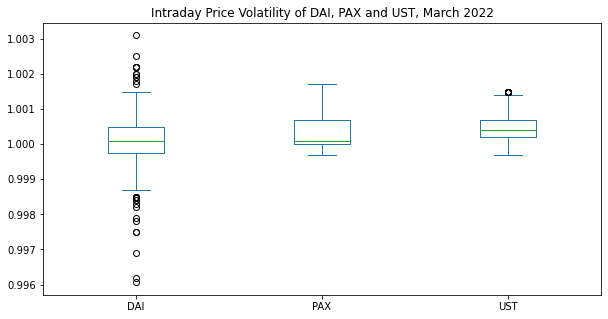

In [11]:
coins_march_2022_box_plot = coins_df_mar_2022.plot(
    kind='box',
    title='Intraday Price Volatility of DAI, PAX and UST, March 2022',
    figsize=(10,5)
)


In [12]:
coins_march_2022_box_plot.figure.savefig('images/coins_intraday_volatility_march_2022.png')

#### March 2022 Stablecoin Volatility Analysis

In March 2022, it was observed that

   * **UST** was the least volatile.  It had the smallest standard deviation and the smallest interquartile range.  This was consistent with the overall data set statistics.
   * **PAX** had smaller interquartile range than DAI and it had nearly the same price standard deviation as DAI.  This is in contrast to the overall dataset statistics, suggesting that PAX volatility may have changed over time.
   * **DAI** had more outliers and the largest interquartile range of the three.  This would indicate that in March of 2022, DAI may have been the most volatile of the three, which is different than the overall statistics, suggesting the DAI volatility may have changed over time.

### Explore 1 Month of High Frequency Data From Early in the Dataset

Use Jan 2019

In [13]:
start = '2019-01-01'
end = '2019-01-31'

In [14]:
# concatenate price data into 1 dataset
dai_minute_jan_2019_df = dai_minute_df[start:end]['close']
pax_minute_jan_2019_df = pax_minute_df[start:end]['close']
ust_minute_jan_2019_df = ust_minute_df[start:end]['close']
coins_df_jan_2019 = pd.concat([dai_minute_jan_2019_df,pax_minute_jan_2019_df,ust_minute_jan_2019_df],axis=1)
coins_df_jan_2019.columns=['DAI','PAX','UST']
describe_with_iqr(coins_df_jan_2019)

,DAI,PAX,UST
count,778.000000,32674.000000,18117.000000
mean,1.016610,1.021067,1.029209
std,0.009606,0.003760,0.010059
min,0.999000,1.011300,1.012000
25%,1.008400,1.018500,1.019500
50%,1.016150,1.021000,1.030400
75%,1.024500,1.024000,1.037300
max,1.037800,1.040700,1.049500
IQR,0.016100,0.005500,0.017800


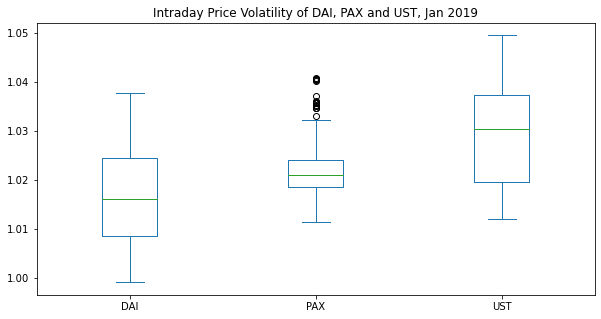

In [15]:
coins_jan_2019_box_plot = coins_df_jan_2019.plot(
    kind='box',
    title='Intraday Price Volatility of DAI, PAX and UST, Jan 2019',
    figsize=(10,5)
)

In [16]:
coins_jan_2019_box_plot.figure.savefig('images/coins_intraday_volatility_jan_2019.png')

#### January 2019 Stablecoin Volatility Analysis 

In January 2022, it was observed that

   * **UST** had the largest interquartile range and the highest standard deviation of the three.  This indicates that in January of 2019, UST had a relatively high amount of price volatility.  Surprisingly, it also had a mean of \\$1.029, almost 3% off of its intended target value.  This is in contrast to the statistics of the overall dataset and to the March 2022 UST satatistics, suggesting that UST volatility may have changed over time.
   * **PAX** had the smallest interquartile range standard deviation of the three. It also has a mean of \\$1.021, which is 2% off of its target value.  This is in contrast to the overall dataset statistics and to those of March 2022, suggesting that PAX volatility may have changed over time.
   * **DAI** had more largest interquartile range of the three.  Its standard deviation was similar to that of UST.  With a mean of \\$1.017, it was the closest to its target value and might have been considered the least volatile of the three during this month.  This is different than the overall statistics, suggesting the DAI volatility may have changed over time.
    
From comparing the price volatility of the selected stablecoins early in the dataset to later in the dataset, there is a strong suggestion that the volatility of the stablecoins changed over time.

### Exploring Rolling Window Volatility

Analyze the statistical trends in 30 day windows.

<AxesSubplot:title={'center':'Rolling 30 Day Mean Prices for DAI, PAX, and UST - 2019-2022'}, xlabel='timestamp'>

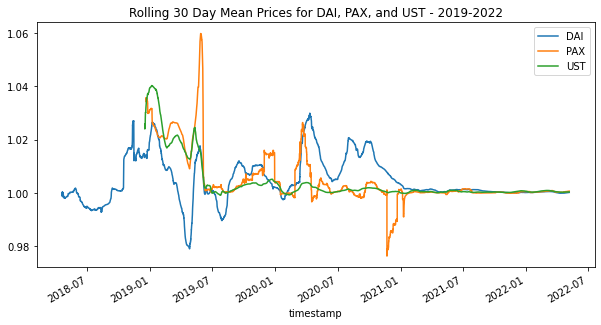

In [17]:
coins_rolling_30D_mean_df = coins_df.rolling('30D').mean()
coins_rolling_30D_mean_df.plot(
    figsize=(10,5),
    title='Rolling 30 Day Mean Prices for DAI, PAX, and UST - 2019-2022'
)


<AxesSubplot:title={'center':'Rolling 30 Day Prices Standard Deviation for DAI, PAX, and UST - 2019-2022'}, xlabel='timestamp'>

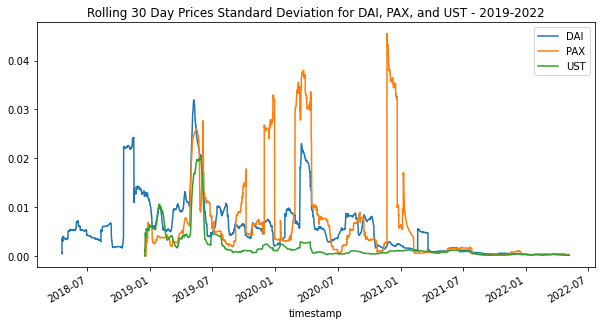

In [18]:
coins_rolling_30D_std_df = coins_df.rolling('30D').std()
coins_rolling_30D_std_df.plot(
    figsize=(10,5),
    title='Rolling 30 Day Prices Standard Deviation for DAI, PAX, and UST - 2019-2022'
)

#### Rolling Window Volatility Analysis

Referring to the *Rolling 30 Day Mean Prices for DAI, PAX, and UST - 2019-2022*, the *Rolling 30 Day Prices Standard Deviation for DAI, PAX, and UST - 2019-2022* and the *Rolling 30 Day Prices IQR for DAI, PAX, and UST - 2019-2022* plots. It is clear to observe that the statistical trends definitely changed over time.

Prior to the end of 2020, there as clearly significant volatility in the price of stablecoins.  It is interesting to note that in early 2019, all three of the selected stablecoins had a mean that significantly deviated from the target price of \\$1.0, by around 2%.  Since this is reflected in the 30 Day rolling window, it would suggest that these were relatively long lived price volatility.  It can also be observed, by looking at the Rolling 30 Day means plot, that **UST** was the first of the three selected stablecoins to truly stabilize and settle to a mean of \\$1.0.  It can also be observed from this plot that early 2021, long lived price volatility were essentially eliminated from all three stable coins. 

The Rolling 30 Day plot of standard deviations seems to correlate these findings.  Prior to the end of 2020, significant could be observed.  The pattern seemed to be unique to each coin.  For example, **PAX** had five periods of significant volatility, each lasting several days.  Sometimes, like the period around June 2019, coincided with high standard deviation periods in the other stablecoins, possibly indicating a market condition that impacted all coins alike. In other times, like the period around the end of 2020, **PAX** was unique in having a high standard deviation period lasting several days, whereas the other stablecoins had much lower standard deviations during this period.  This might indicate a period where **PAX** was unique in having high volatility.  The most striking observation, when looking at the Rolling 30 Day standard deviations plot, though, is that after the beginning of 2021, the standard deviations of all three stablecoins was significantly reduced, indicating that these stablecoins truely became stable, with very little volatility and consistently priced at their target price of \\$1.0.  Another observation that can be made from this plot is that **UST** was the first of the three stablecoins to reach a consistent state of low volatility.  Starting around August of 2019, **UST** consistently had lower standard deviation than the other stablecoins.

These plots suggest that prior to the end of 2020, there was quite a bit of price volatility in stablecoins and since these were long lasting and significant in scale, there may have bmay have been good arbitrage opportunities.  However, starting in early 2021, the stablecoins seem to loose volatility and became stable with very low variance, indicating that after the beginning of 2021, there is insufficient volatility in stablecoin pricing for profitable arbitrage.

## Explore single day price volatility

In [19]:
#pick an arbitrary day
day='2019-04-11'
dai_intraday_s=dai_minute_df['close'].loc[day]
pax_intraday_s=pax_minute_df['close'].loc[day]
ust_intraday_s=ust_minute_df['close'].loc[day]
coins_intraday_df = pd.concat([dai_intraday_s,pax_intraday_s,ust_intraday_s],axis=1)
coins_intraday_df.columns=['DAI','PAX','UST']

<AxesSubplot:title={'center':'Intraday Price Volatility DAI, PAX, UST - 2019-04-11'}, xlabel='timestamp'>

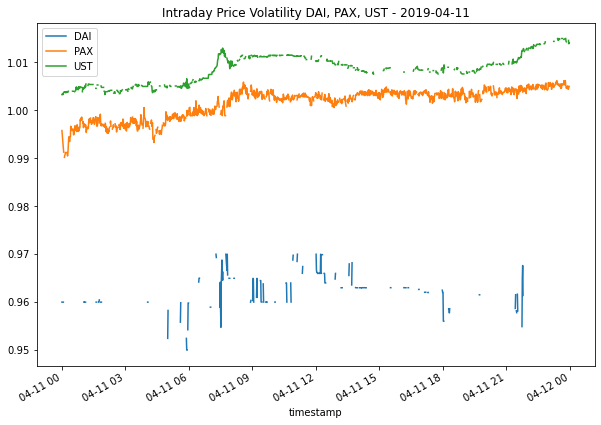

In [20]:
coins_intraday_df.plot(
    figsize=(10,7),
    title=f"Intraday Price Volatility DAI, PAX, UST - {day}"
)

### Intraday Volatility Analysis

The *Intraday Price Volatility DAI, PAX, UST - 2019-04-11* plot suggests that the variation in price of the stable coin was small in magnitude.  The price of the stablecoin within a day stayed close to its average price for the day.

## Explore Rolling 1 Day Statistics
Analyze the statistical trends in 1 day windows.

<AxesSubplot:title={'center':'Rolling 1 Day Mean Prices for DAI, PAX, and UST - 2019-2022'}, xlabel='timestamp'>

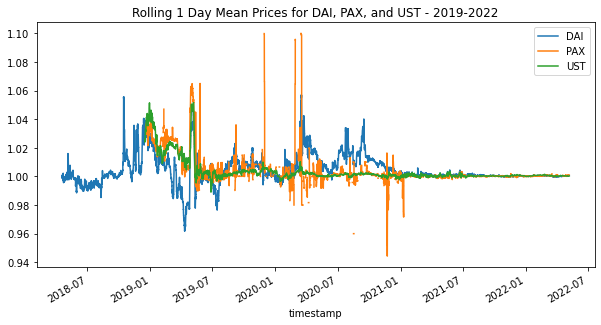

In [21]:
coins_rolling_1D_mean_df = coins_df.rolling('1D').mean()
coins_rolling_1D_mean_df.plot(
    figsize=(10,5),
    title='Rolling 1 Day Mean Prices for DAI, PAX, and UST - 2019-2022'
)


<AxesSubplot:title={'center':'Rolling 1 Day Prices Standard Deviation for DAI, PAX, and UST - 2019-2022'}, xlabel='timestamp'>

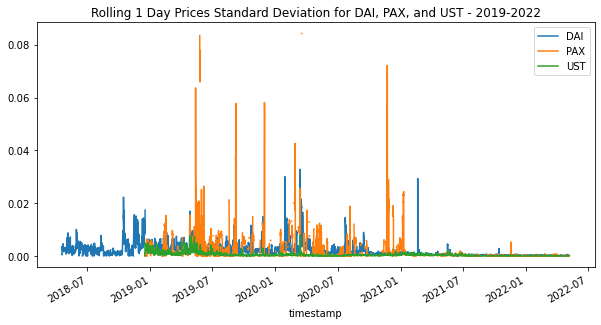

In [22]:
coins_rolling_1D_std_df = coins_df.rolling('1D').std()
coins_rolling_1D_std_df.plot(
    figsize=(10,5),
    title='Rolling 1 Day Prices Standard Deviation for DAI, PAX, and UST - 2019-2022'
)

### Rolling 1 Day Volatility Analysis

In looking at the *Rolling 1 Day Mean Prices for DAI, PAX, and UST - 2019-2022* plot, it can be observed that large deviations in stablecoin price away from its target value of \\$1.0 were typically short lived, typically corrected within 1 or a few days.  

The *Rolling 1 Day Prices Standard Deviation for DAI, PAX, and UST - 2019-2022* plot seems to confirm the earlier observation that the intraday volatility is relatively small in magnitude and is much smaller than that shown in the ** plot.  This suggest that day trading (buying and selling multiple times within a day) might not be a good strategy to employ if seeking to profit from arbitrage in stablecoin price volatility.  The variance appears to be too small in the span of a single day.  Instead, a buy and sell strategy spanning 2 or more days might be a better strategy.


## Explore Rolling 4 Day Statistics

Given that the Rolling 30 Day statistics suggest there were periods of relatively high volatility in stablecoin price and given that the Rolling 1 Day statictics showed that the same day variance was typically very small, 4 Day Rolling statistics will be explored as a time span in between the other two. 


<AxesSubplot:title={'center':'Rolling 4 Day Mean Prices for DAI, PAX, and UST - 2019-2022'}, xlabel='timestamp'>

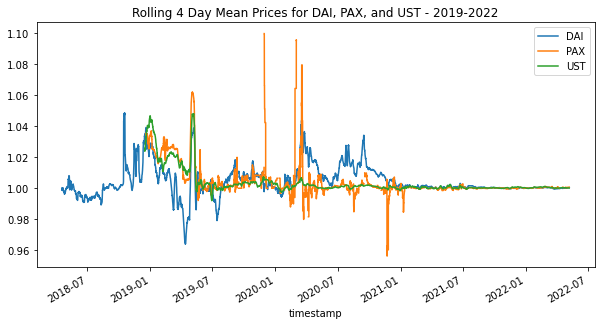

In [23]:
coins_rolling_4D_mean_df = coins_df.rolling('4D').mean()
coins_rolling_4D_mean_df.plot(
    figsize=(10,5),
    title='Rolling 4 Day Mean Prices for DAI, PAX, and UST - 2019-2022'
)

<AxesSubplot:title={'center':'Rolling 4 Day Prices Standard Deviation for DAI, PAX, and UST - 2019-2022'}, xlabel='timestamp'>

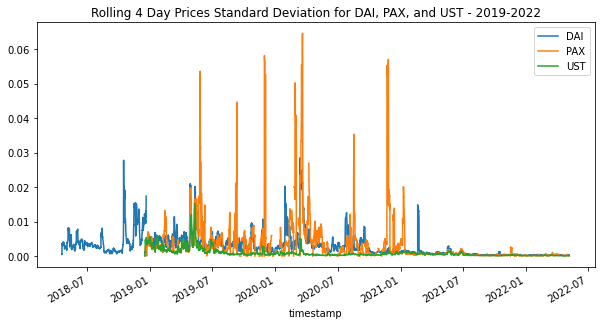

In [24]:
coins_rolling_4D_std_df = coins_df.rolling('4D').std()
coins_rolling_4D_std_df.plot(
    figsize=(10,5),
    title='Rolling 4 Day Prices Standard Deviation for DAI, PAX, and UST - 2019-2022'
)

### Rolling 4 Day Analysis

In looking at the Rolling 4 Day statistics, many of the large stablecoin price deviations away from the target price of \\$1.00  observed in the Rolling 1 Day Mean Price are also seen in the Rolling 4 Day Mean Price.  This would again confirm that several of the big volatility events spanned more than 1 day.  

The Rolling 4 Day Standard Deviation had more datapoints above 0, suggesting that the deviations were better observed in spans larger than a single day. 

In [25]:
# redo duriong weekend to include 5/8-5/11